In [15]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import sys
sys.path.append("../../")
from src.soporte_metricas import(
    generar_df_comparador,
    scatterplot_regresion,
    residual_plot,
    obtener_metricas
)
pd.options.display.float_format = "{:,.2f}".format

In [16]:
df = pd.read_csv("../../datos/06_rent_outliers_gestionados.csv")

In [17]:
df.shape

(353, 112)

# Realizamos Regresión Lineal

### Dividimos los Grupos (70% train y 30% test)

In [18]:
X = df.drop(columns="price")
y = df[["price"]]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=42)

### Generamos Regresión Lineal

In [20]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train,y_train)

LinearRegression()

### Hacemos predicciones de Precio del 70% y el 30%
Con ello veremos que tan bien se le da a nuestro modelo predecir


In [21]:
y_train_pred = modelo_lineal.predict(X_train)
y_train_pred[:3]

array([[743.73242188],
       [714.27539062],
       [749.91015625]])

In [22]:
y_test_pred = modelo_lineal.predict(X_test)
y_test_pred[:3]

array([[712.15625   ],
       [706.79296875],
       [737.6328125 ]])

# Veamos las métricas

In [23]:
obtener_metricas(y_train,y_train_pred,y_test,y_test_pred)

,r2_score,MAE,MSE,RMSE
train,0.77,21.97,958.54,30.96
test,"-116,527,642,263,790,092,288.00","88,141,048,467.39","341,929,489,563,793,575,903,232.00","584,747,372,430.00"


### Un desastre??
- Veamos la s gráficas


# Visualizar Modelo
- Así vemos que tal se ajusta a la realidad

In [24]:
df_comparador = generar_df_comparador(X_train,X_test,y_train,y_test,y_train_pred,y_test_pred,"price_pred")

In [25]:
comparaciones = df_comparador[["price","price_pred"]]

In [26]:
comparaciones["diferencia"] = comparaciones["price_pred"] - comparaciones["price"]
comparaciones.head()

,price,price_pred,diferencia
0,750.00,745.09,-4.91
1,750.00,737.88,-12.12
2,400.00,498.69,98.69
3,590.00,606.28,16.28
4,684.00,693.01,9.01


# Scatter Plot 
- Con su línea de Regresión

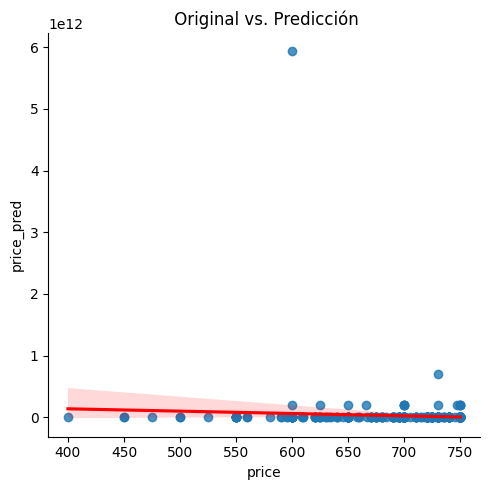

In [27]:
scatterplot_regresion(df_comparador,"price","price_pred")

# Sobre la gráfica
- Confirma que las predicciones se acercan a la realidad
- Si es verdad que como nos faltan datos de los más baratos, el modelo tiende a no acercarse tanto

# Residual Plot

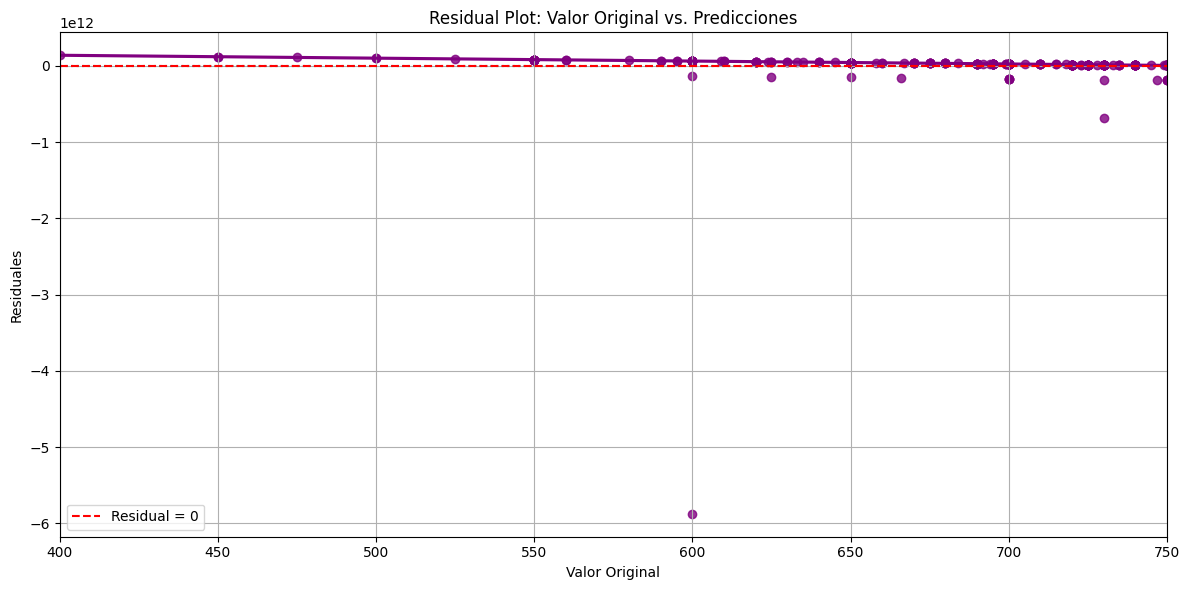

In [28]:
residual_plot(df_comparador,"price","price_pred")

# Sobre la gráfica
- Está encontrando problemas en los precios extremos
- En los precios intermedios se ajusta mejor
- En las casas más baratas tiende a sobre-estimar los precios

- Esto nos vuelve a indicar que la regresión Lineal no es el mejor modelo para nosotros, pasemos a Modelos no Lineales